In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('logs.csv')
df.head()

,Algoritmo,Número de Clusters,Número Máximo de Iterações,Centros dos Clusters,Inércia,Coesão,Coeficiente de Silhueta,Rand Score,Homogeneidade,Completude,Entropia,Matriz de Contingência
0,KMEANS,2.0,100,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
1,KMEANS,2.0,200,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
2,KMEANS,2.0,300,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
3,KMEANS,2.0,400,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"
4,KMEANS,2.0,500,"[[1.3339195427566404, 1.05869421850957, 2.1200...",199292.488867,223.210937,0.275966,0.729135,0.364306,0.367773,8.182,"[[3722, 486], [826, 3090]]"


In [5]:
df_kmeans = df[df['Algoritmo'] == 'KMEANS']

maior_homogeneidade = df_kmeans['Homogeneidade'].idxmax()
maior_homogeneidade = df_kmeans.iloc[maior_homogeneidade]

maior_completude = df_kmeans['Completude'].idxmax()
maior_completude = df_kmeans.iloc[maior_completude]

maior_completude
# maior_homogeneidade


Algoritmo                                                                KMEANS
Número de Clusters                                                          2.0
Número Máximo de Iterações                                                  100
Centros dos Clusters          [[1.3339195427566404, 1.05869421850957, 2.1200...
Inércia                                                           199292.488867
Coesão                                                               223.210937
Coeficiente de Silhueta                                                0.275966
Rand Score                                                             0.729135
Homogeneidade                                                          0.364306
Completude                                                             0.367773
Entropia                                                                  8.182
Matriz de Contingência                               [[3722, 486], [826, 3090]]
Name: 0, dtype: object

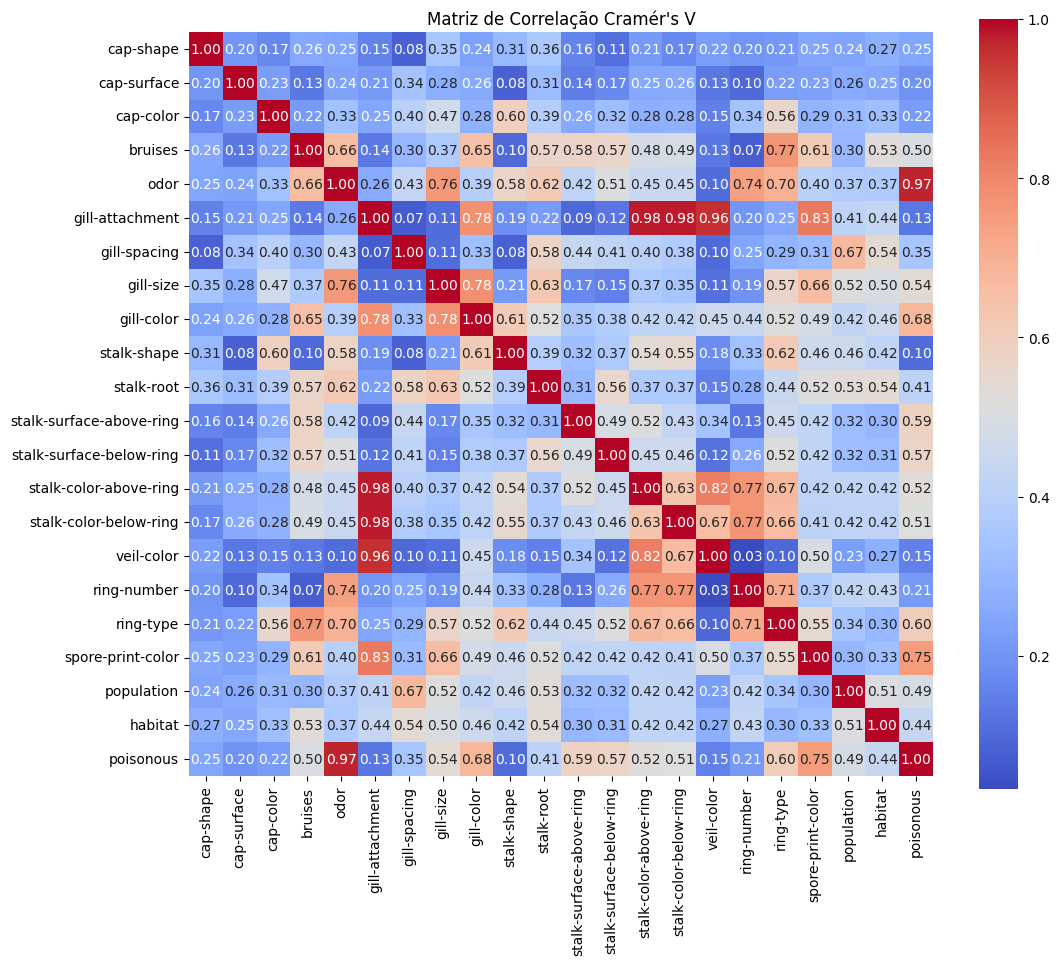

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# Função para calcular Cramér's V com tratamento de divisões inválidas
def cramers_v(x, y):
    # Cria tabela de contingência
    confusion_matrix = pd.crosstab(x, y)
    
    if confusion_matrix.size == 0:
        return np.nan  # Retorna NaN se a tabela estiver vazia
    
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    
    # Verifica se o denominador é zero para evitar divisão inválida
    denom = n * (min(r - 1, k - 1))
    if denom == 0:
        return np.nan  # Retorna NaN se o denominador for zero
    
    return np.sqrt(chi2 / denom)

# Função para gerar a matriz de correlação
def correlation_ratio_matrix(df):
    cols = df.columns
    corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for i in range(len(cols)):
        for j in range(i, len(cols)):
            # Substitui NaN por uma nova categoria "missing"
            x = df.iloc[:, i].fillna('missing')
            y = df.iloc[:, j].fillna('missing')

            corr_matrix.iat[i, j] = cramers_v(x, y)
            corr_matrix.iat[j, i] = corr_matrix.iat[i, j]

    return corr_matrix

# Fetch dataset
mushroom = fetch_ucirepo(id=73)

# Data (as pandas dataframes)
X = pd.DataFrame(mushroom.data.features)  
y = pd.DataFrame(mushroom.data.targets)  

# Concatenando os DataFrames
df = pd.concat([X, y], axis=1)
# df = df.dropna()
df = df.drop(columns='veil-type')

# Gerar matriz de correlação Cramér's V
correlation_matrix = correlation_ratio_matrix(df)

# Imprimir a matriz de correlação

# Plotar a matriz de correlação usando Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação Cramér\'s V')
plt.show()


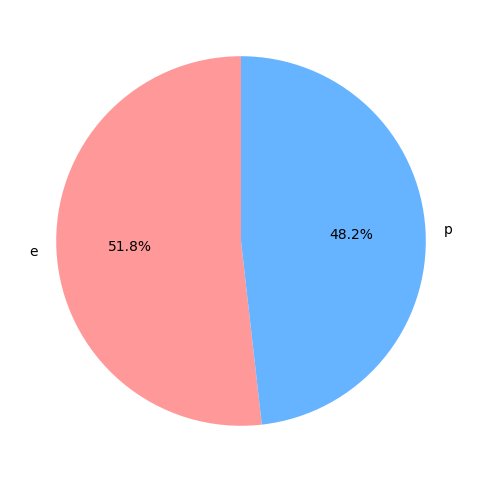

In [7]:
# Contando as ocorrências de cada classe
class_counts = y['poisonous'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.show()

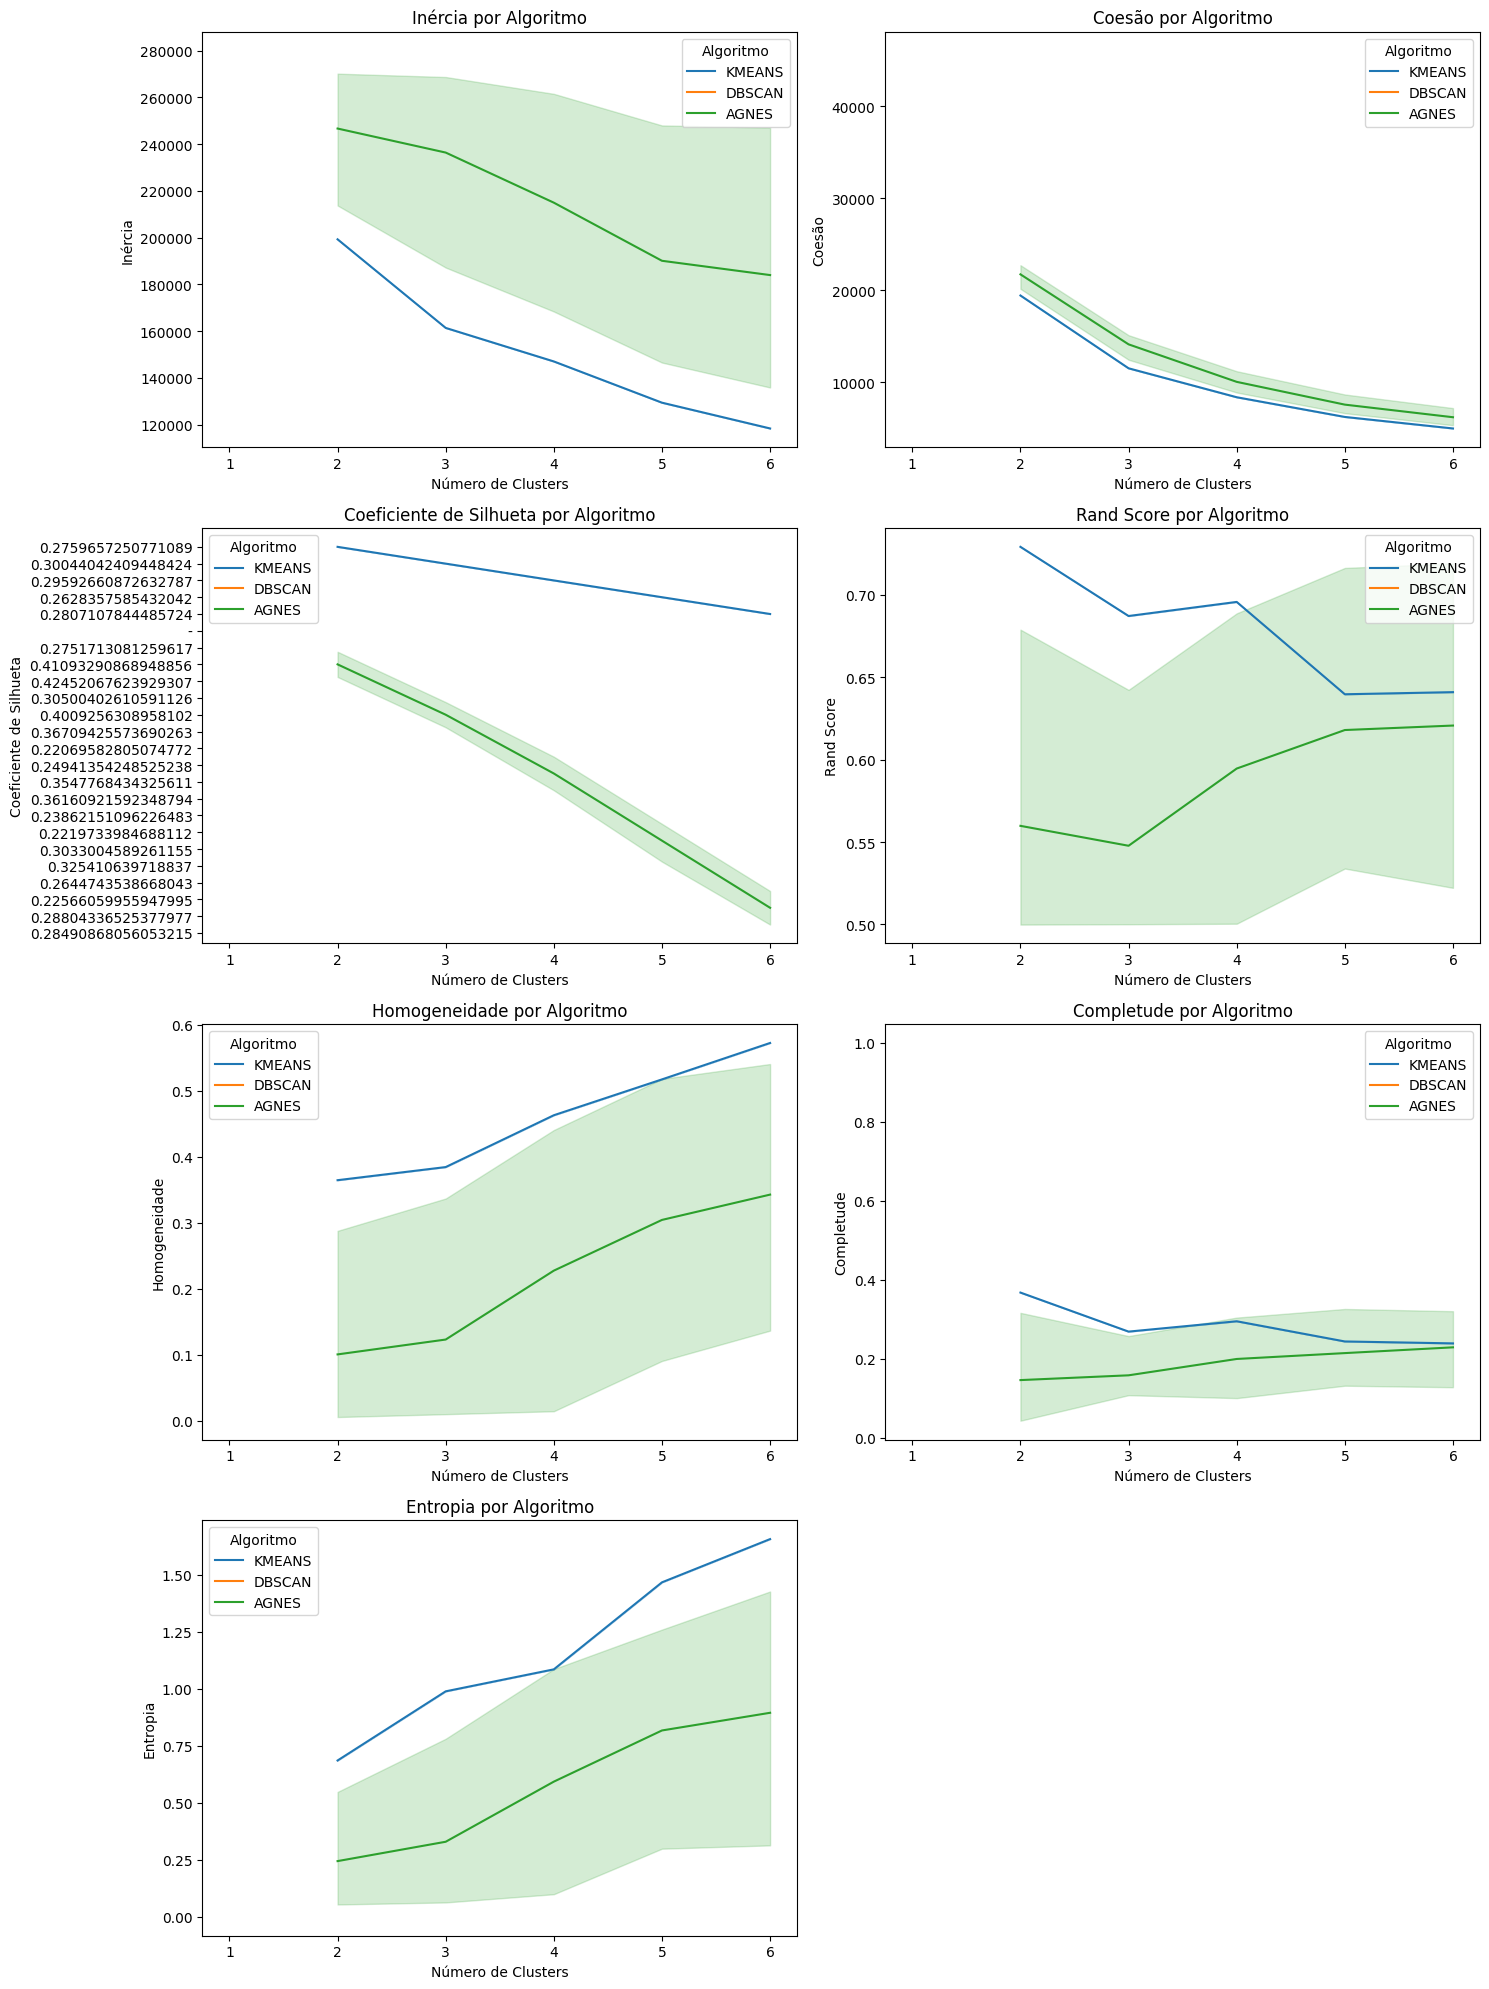

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
data = pd.read_csv('logs2.csv')

# Definir as métricas e os títulos dos gráficos
metrics = [
    'Inércia', 'Coesão', 'Coeficiente de Silhueta', 
    'Rand Score', 'Homogeneidade', 'Completude', 'Entropia'
]
titles = [
    'Inércia por Algoritmo', 'Coesão por Algoritmo', 
    'Coeficiente de Silhueta por Algoritmo', 'Rand Score por Algoritmo', 
    'Homogeneidade por Algoritmo', 'Completude por Algoritmo', 
    'Entropia por Algoritmo'
]

# Criar a grid de gráficos
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

# Gerar gráficos
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.lineplot(x='Número de Clusters', y=metric, hue='Algoritmo', data=data, ax=ax)
    ax.set_title(titles[i])
    ax.legend(title='Algoritmo')

# Remover o último gráfico vazio
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


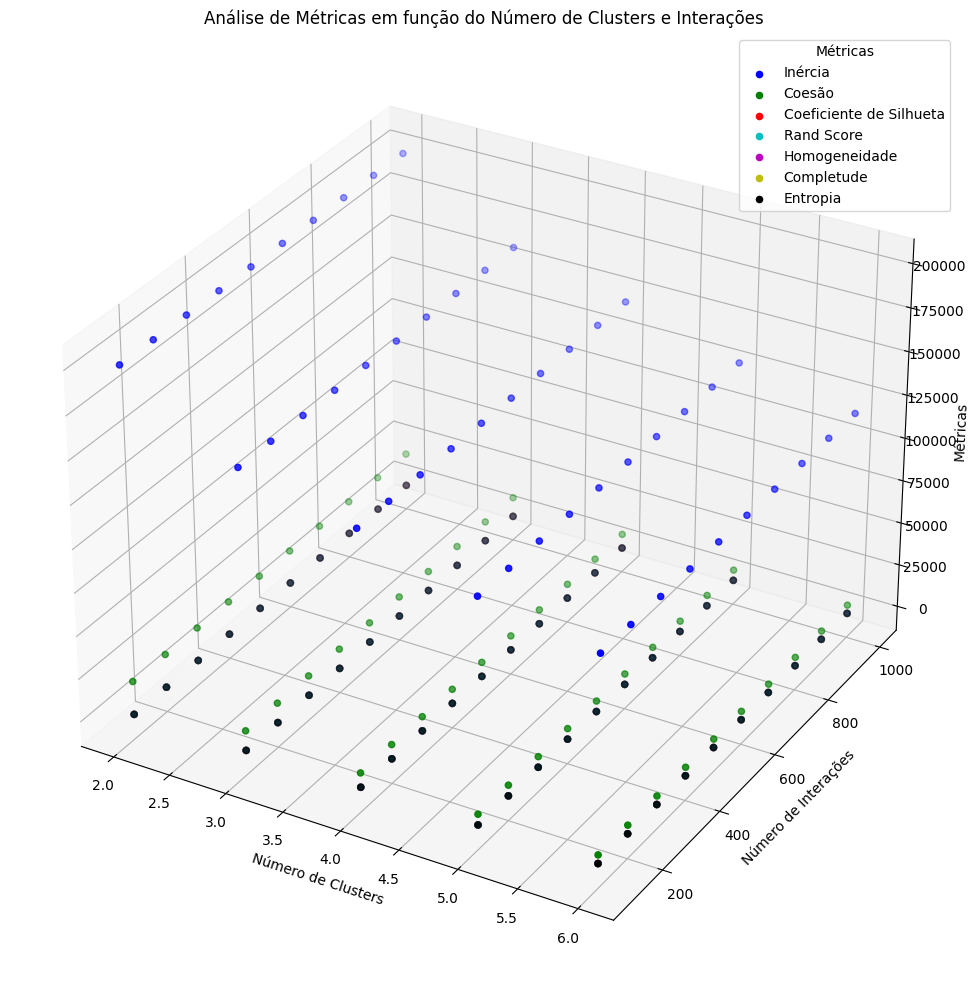

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar os dados do CSV
data = pd.read_csv('kmeans_logs.csv')

# Filtrar apenas os dados do KMeans

# Certifique-se de que as colunas estão no formato correto
# Substitua 'var1' e 'var2' pelos nomes reais das colunas

# Definir as métricas a serem analisadas
metrics = ['Inércia', 'Coesão', 'Coeficiente de Silhueta', 
           'Rand Score', 'Homogeneidade', 'Completude', 'Entropia']


# Criar gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Definindo as variáveis para o gráfico
x = data['Número de Clusters']
y = data['var2']

# Iterar sobre as métricas e plotar cada uma com uma cor diferente
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Cores para as métricas
for i, metric in enumerate(metrics):
    z = data[metric]
    ax.scatter(x, y, z, c=colors[i], marker='o', label=metric)

# Configurar os rótulos
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Número de Interações')
ax.set_zlabel('Métricas')
ax.set_title('Análise de Métricas em função do Número de Clusters e Interações')

# Adicionar legenda
ax.legend(title='Métricas')

plt.tight_layout()
plt.show()


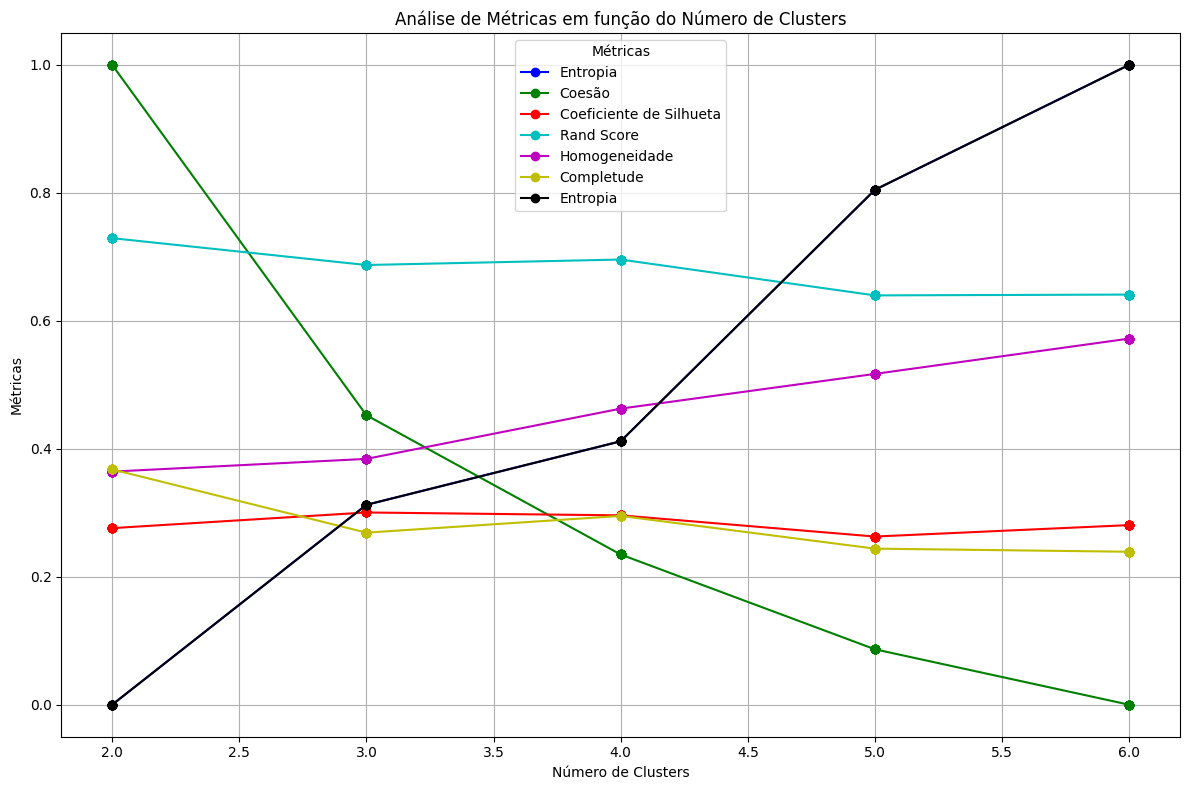

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
data = pd.read_csv('kmeans_logs.csv')
data['Entropia'] = (data['Entropia'] - data['Entropia'].min()) / (data['Entropia'].max() - data['Entropia'].min())
data['Coesão'] = (data['Coesão'] - data['Coesão'].min()) / (data['Coesão'].max() - data['Coesão'].min())



# Definir as métricas a serem analisadas
metrics = ['Entropia','Coesão', 'Coeficiente de Silhueta', 
           'Rand Score', 'Homogeneidade', 'Completude', 'Entropia']

# Criar gráfico 2D
plt.figure(figsize=(12, 8))

# Iterar sobre as métricas e plotar cada uma
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Cores para as métricas
for i, metric in enumerate(metrics):
    plt.plot(data['Número de Clusters'], data[metric], color=colors[i], marker='o', label=metric)

# Configurar os rótulos
plt.xlabel('Número de Clusters')
plt.ylabel('Métricas')
plt.title('Análise de Métricas em função do Número de Clusters')
plt.legend(title='Métricas')

# Exibir o gráfico
plt.grid()
plt.tight_layout()
plt.show()


0.316719789129367


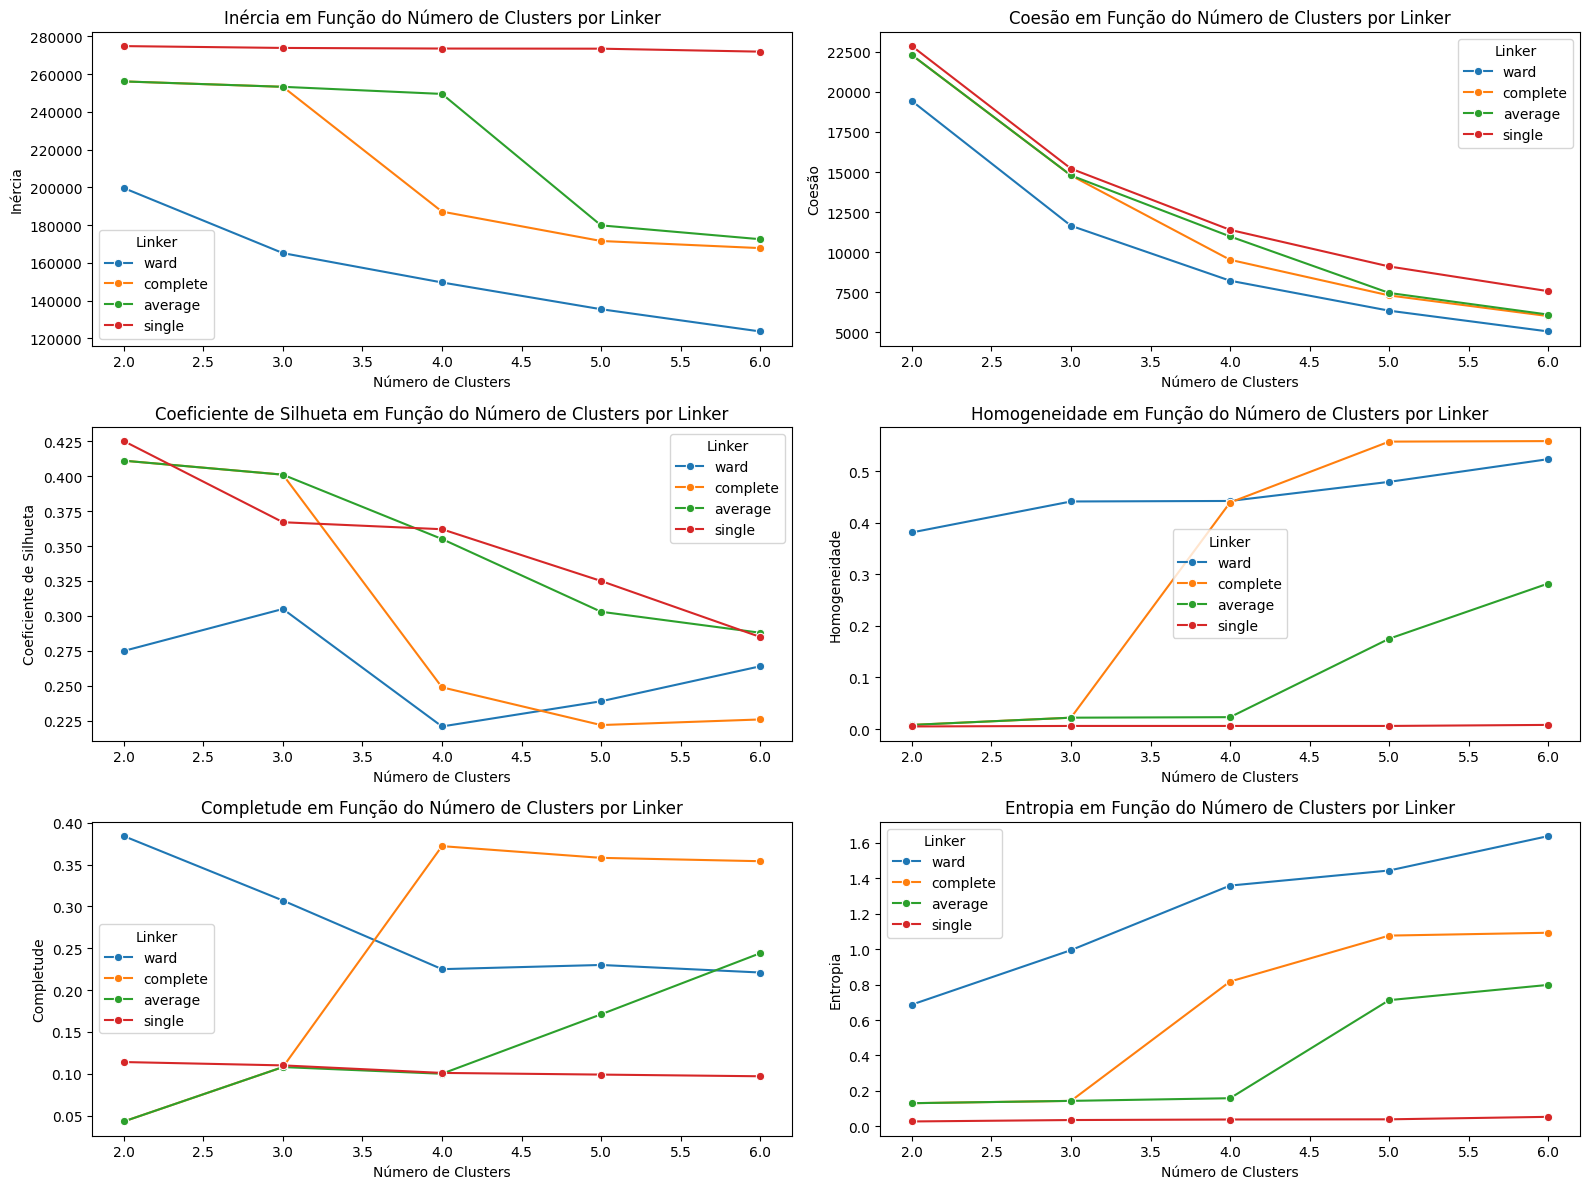

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
data = pd.read_csv('agnes_logs.csv')

# Filtrar apenas os dados do AGNES
agnes_data = data[data['Algoritmo'] == 'AGNES']


print(agnes_data['Coeficiente de Silhueta'].mean())
# Arredondar todos os valores numéricos para 3 casas decimais
agnes_data = agnes_data.round(3)

# Criar uma nova coluna 'Linker' para a variável 'var2'
agnes_data['Linker'] = agnes_data['var2']  # Ou outra transformação necessária

# Definir as métricas a serem plotadas
metrics = ['Inércia', 'Coesão', 'Coeficiente de Silhueta', 'Homogeneidade', 'Completude', 'Entropia']

# Criar gráficos de tendências
plt.figure(figsize=(16, 12))

# Loop para criar os gráficos
for i, metric in enumerate(metrics):
    ax = plt.subplot(3, 2, i + 1)  # 3 linhas e 2 colunas
    for linker in agnes_data['Linker'].unique():
        subset = agnes_data[agnes_data['Linker'] == linker]
        sns.lineplot(x='Número de Clusters', y=metric, data=subset, marker='o', label=linker, ax=ax)
    
    ax.set_title(f'{metric} em Função do Número de Clusters por Linker')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel(metric)
    
    # Ajustar limites do eixo y para o Coeficiente de Silhueta
    if metric == 'Coeficiente de Silhueta':
        ax.set_ylabel('Coeficiente de Silhueta')
        # ax.set_ylim(0, 20)  # Limites típicos para o Coeficiente de Silhueta

    ax.legend(title='Linker')

plt.tight_layout()
plt.show()


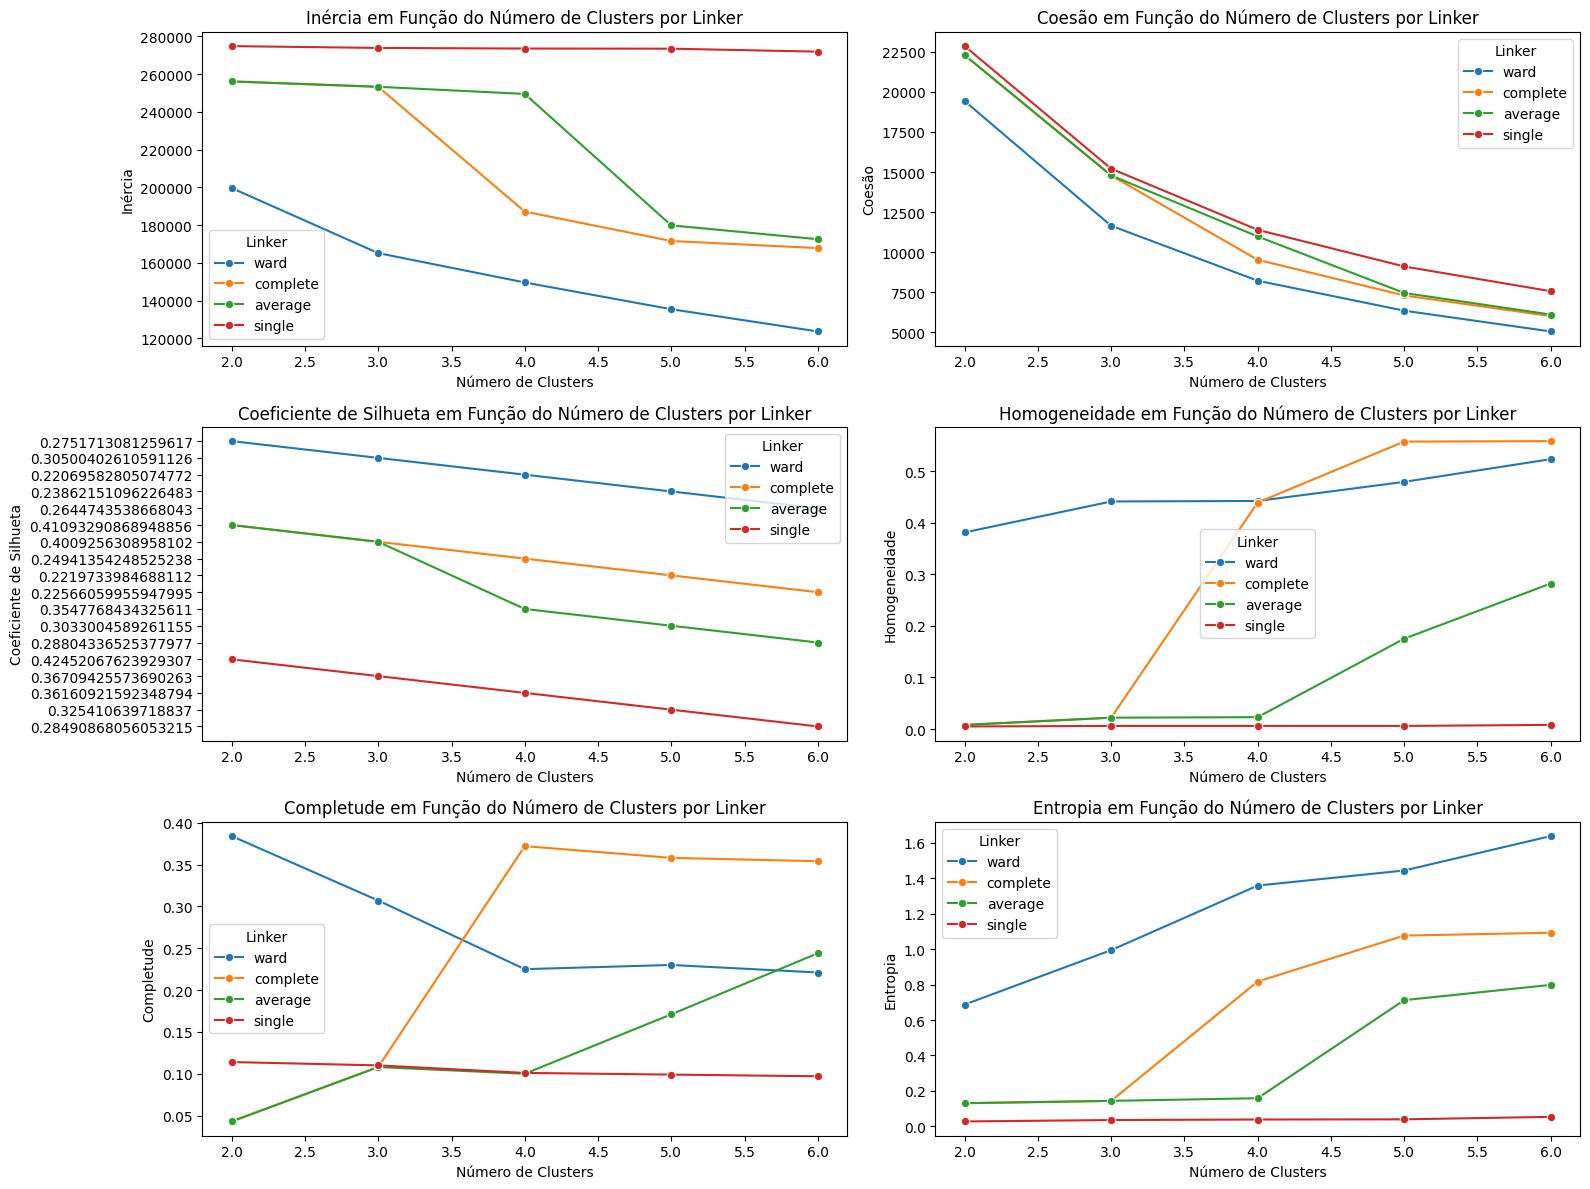

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
data = pd.read_csv('logs2.csv')

# Filtrar apenas os dados do AGNES
agnes_data = data[data['Algoritmo'] == 'AGNES']

# Arredondar todos os valores numéricos para 3 casas decimais
agnes_data = agnes_data.round(3)

# Criar uma nova coluna 'Linker' para a variável 'var2'
agnes_data['Linker'] = agnes_data['var2']  # Ou outra transformação necessária

# Definir as métricas a serem plotadas
metrics = ['Inércia', 'Coesão', 'Coeficiente de Silhueta', 'Homogeneidade', 'Completude', 'Entropia']

# Criar gráficos de tendências
plt.figure(figsize=(16, 12))

# Loop para criar os gráficos
for i, metric in enumerate(metrics):
    ax = plt.subplot(3, 2, i + 1)  # 3 linhas e 2 colunas
    for linker in agnes_data['Linker'].unique():
        subset = agnes_data[agnes_data['Linker'] == linker]
        sns.lineplot(x='Número de Clusters', y=metric, data=subset, marker='o', label=linker, ax=ax)
    
    ax.set_title(f'{metric} em Função do Número de Clusters por Linker')
    ax.set_xlabel('Número de Clusters')
    ax.set_ylabel(metric)
    ax.legend(title='Linker')

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv("logs3.csv")

# Selecionar apenas as colunas numéricas
numeric_columns = data.select_dtypes(include='number').columns

# Encontrar as linhas com os valores máximos e mínimos nas colunas numéricas
max_rows = data.loc[data[numeric_columns].idxmax()]
min_rows = data.loc[data[numeric_columns].idxmin()]

# Exibir resultados
print("Linhas com valores máximos:")
print(max_rows)

print("\nLinhas com valores mínimos:")
print(min_rows)


Linhas com valores máximos:
   Algoritmo  Número de Clusters  var1  var2        Inércia  \
10    DBSCAN                   8     2    50  212778.057673   
80    DBSCAN                   1     9    50  279943.571147   
9     DBSCAN                   1     1   500  279943.571147   
0     DBSCAN                   1     1    50  279943.571147   
31    DBSCAN                   4     4   100  150951.388324   
20    DBSCAN                   8     3    50  134114.836144   
0     DBSCAN                   1     1    50  279943.571147   
10    DBSCAN                   8     2    50  212778.057673   

               Coesão Coeficiente de Silhueta  Rand Score  Homogeneidade  \
10  927.5640125134265   -0.011066264145688537    0.535624       0.395238   
80  46016.82812421507                       -    0.500584       0.000000   
9                   -                       -    0.500584       0.000000   
0                   -                       -    0.500584       0.000000   
31  7512.678423399045   